In [19]:
import pandas  as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import selenium
import feedparser
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.by import By 
import requests as req
from bs4 import BeautifulSoup as bs    # ambos alias son cosa mia
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from selenium.webdriver.chrome.options import Options
# opciones del driver

opciones=Options()

# quita la bandera de ser robot
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False   # si True, no aparece la ventana (headless=no visible)

opciones.add_argument('--start-maximized')         # comienza maximizado

#opciones.add_argument('--incognito')              # incognito


In [3]:
from webdriver_manager.chrome import ChromeDriverManager

PATH=ChromeDriverManager().install()

[WDM] - Downloading: 100%|██████████| 8.84M/8.84M [00:00<00:00, 32.0MB/s]


In [4]:
import time   # para manejar tiempo

from selenium.webdriver.support.ui import WebDriverWait   # es para esperar

from selenium.webdriver.support import expected_conditions as EC  # condiciones esperadas...

from selenium.webdriver import ActionChains as AC   # acciones encadenadas, rollo doble click

from selenium.webdriver.common.keys import Keys  # manejar teclas

GET COLUMNS FROM NASA

In [5]:
url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars'

In [6]:
driver=webdriver.Chrome(PATH, options=opciones)
html=req.get(url).content   # o .text


In [7]:
driver.get(url)

In [8]:
columnsraw = driver.find_elements(By.CSS_SELECTOR, 'div.hdrcell')

In [9]:
columnas = [e.text for e in columnsraw]

In [10]:
columnas  = columnas[2:17]

In [11]:
new = []
for e in columnas:
    new.append(e[2:].lower().replace(' ','_'))

In [12]:
columnas = new

In [13]:
columnas

['planet_name',
 'host_name',
 'orbital_period_[days]',
 'orbit_semi-major_axis_[au])',
 'planet_radius_[earth_radius]',
 'planet_mass_or_mass*sin(i)_[earth_mass]',
 'planet_density_[g/cm**3]',
 'eccentricity',
 'equilibrium_temperature_[k]',
 'ratio_of_semi-major_axis_to_stellar_radius',
 'stellar_effective_temperature_[k]',
 'stellar_radius_[solar_radius]',
 'stellar_mass_[solar_mass]',
 'stellar_metallicity_[dex]',
 'distance_[pc]']

GET DATA FROM DATABASE

In [15]:
tabla1 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [24]:
tabla2 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [15]:
tabla3 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [16]:
ggggg1 =  tabla1.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [17]:
nasa1 = [i.text for i in ggggg1]

In [22]:
#nasa1

In [27]:
part1 = pd.DataFrame(data=nasa1)

In [28]:
part1.to_csv('part1.csv')

In [25]:
bbbbb2 =  tabla2.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [26]:
nosa2 = [i.text for i in bbbbb2]

In [30]:
part2 = pd.DataFrame(data=nosa2)

In [31]:
part2.to_csv('part2.csv')

In [16]:
aaaaa3 =  tabla3.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [17]:
nisa3 = [i.text for i in aaaaa3]

In [18]:
part3 = pd.DataFrame(data=nisa3)

In [19]:
part3.to_csv('part3.csv')

In [20]:
tabla4 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [21]:
ccccc4 =  tabla4.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [22]:
nesa4 = [i.text for i in ccccc4]

In [23]:
part4 = pd.DataFrame(data=nesa4)

In [24]:
part4.to_csv('part4.csv')

In [25]:
tabla5 = driver.find_element(By.XPATH, '//*[@id="icetable_icetbl_gridholder_1"]/div[2]/table')

In [26]:
ddddd5 =  tabla5.find_elements(By.CSS_SELECTOR, "td[valign='middle']")

In [27]:
nusa5 = [i.text for i in ddddd5]

In [28]:
part5 = pd.DataFrame(data=nusa5)

In [29]:
part5.to_csv('part5.csv')

In [32]:
firstpart = pd.read_csv('part1.csv')
secondpart = pd.read_csv('part2.csv')
thirdpart = pd.read_csv('part3.csv')
fourthpart = pd.read_csv('part4.csv')
fifthpart = pd.read_csv('part5.csv')

In [35]:
firstpart = firstpart.drop(columns=['Unnamed: 0'])
secondpart = secondpart.drop(columns=['Unnamed: 0'])
thirdpart = thirdpart.drop(columns=['Unnamed: 0'])
fourthpart = fourthpart.drop(columns=['Unnamed: 0'])
fifthpart = fifthpart.drop(columns=['Unnamed: 0'])

In [50]:
firstpart = firstpart.rename(columns={firstpart.columns[0]: 'data'})
secondpart = secondpart.rename(columns={secondpart.columns[0]: 'data'})
thirdpart = thirdpart.rename(columns={thirdpart.columns[0]: 'data'})
fourthpart = fourthpart.rename(columns={fourthpart.columns[0]: 'data'})
fifthpart = fifthpart.rename(columns={fifthpart.columns[0]: 'data'})

In [51]:
data1 = list(firstpart['data'])
data2 = list(secondpart['data'])
data3 = list(thirdpart['data'])
data4 = list(fourthpart['data'])
data5 = list(fifthpart['data'])

In [56]:
len(data1), len(data2), len(data3), len(data4), len(data5)

(20178, 19278, 20106, 18900, 25344)

In [58]:
firstback = firstpart.copy()
secondback = secondpart.copy()
thirdback = thirdpart.copy()
fourthback = fourthpart.copy()
fifthback = fifthpart.copy()

In [60]:
firstback.to_csv('firstback.csv')
secondback.to_csv('secondback.csv')
thirdback.to_csv('thirdback.csv')
fourthback.to_csv('fourthback.csv')
fifthback.to_csv('fifthback.csv')

In [69]:
data1 = data1[2:]
data2 = data2[2:]
data3 = data3[2:]
data4 = data4[2:]
data5 = data5[2:]

In [84]:
test = data1

In [96]:
type(test[16])

float

In [109]:
def deletenan(dataset):
    new = []
    for i in dataset:
        if type(i) != float:
            new.append(i)
    return new

In [114]:
data1 = deletenan(data1)
data2 = deletenan(data2)
data3 = deletenan(data3)
data4 = deletenan(data4)
data5 = deletenan(data5)

In [143]:
data3[15:30]

['11 UMi b',
 '11 UMi',
 '516.21997000',
 '1.530000',
 '12.300',
 '4684.81420',
 '13.800000',
 '0.080000',
 ' ',
 ' ',
 '4213.00',
 '29.79',
 '2.78',
 '-0.020',
 '125.3210000']

In [155]:
#divide la lista en sublistas de 15 elementos. we use yield because we want to return a generator. a generator is an object that can be iterated over (one value at a time). 
#the difference to simply a return is that the generator does not store the values in memory, it generates them on the fly. this is a huge advantage when dealing with large datasets. the yield keyword is used like return, except the function will return a generator.

def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

data1 = list(divide_chunks(data1, 15))
data2 = list(divide_chunks(data2, 15))
data3 = list(divide_chunks(data3, 15))
data4 = list(divide_chunks(data4, 15))
data5 = list(divide_chunks(data5, 15))

In [151]:
firstdf = pd.DataFrame(data1, columns=columnas)
seconddf = pd.DataFrame(data2, columns=columnas)
thirddf = pd.DataFrame(data3, columns=columnas)
fourthdf = pd.DataFrame(data4, columns=columnas)
fifthdf = pd.DataFrame(data5, columns=columnas)

In [154]:
len(firstdf) + len(seconddf) + len(thirddf) + len(fourthdf) + len(fifthdf)

5767

In [157]:
#concatenamos los dataframes
exo = pd.concat([firstdf, seconddf, thirddf, fourthdf, fifthdf], ignore_index=True)

In [160]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius_[earth_radius],planet_mass_or_mass*sin(i)_[earth_mass],planet_density_[g/cm**3],eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [159]:
exo.to_csv('exo.csv')

In [161]:
backup_exo = exo.copy()

In [162]:
backup_exo.to_csv('backup_exo.csv')

CLEAN DATA

In [8]:
exo = pd.read_csv('exo.csv')

In [10]:
exo = exo.rename(columns={'planet_radius_[earth_radius]': 'planet_radius', 'planet_mass_or_mass*sin(i)_[earth_mass]': 'planet_mass', 'planet_density_[g/cm**3]': 'planet_density'})

In [12]:
exo.to_csv('exocleancolumn.csv')

In [13]:
exo.head()

,Unnamed: 0,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [15]:
exo = exo.drop(columns=['Unnamed: 0'])

In [17]:
exo.head()

,planet_name,host_name,orbital_period_[days],orbit_semi-major_axis_[au]),planet_radius,planet_mass,planet_density,eccentricity,equilibrium_temperature_[k],ratio_of_semi-major_axis_to_stellar_radius,stellar_effective_temperature_[k],stellar_radius_[solar_radius],stellar_mass_[solar_mass],stellar_metallicity_[dex],distance_[pc]
0,11 Com b,11 Com,326.03000000,1.290000,12.100,6165.60000,19.100000,0.231000,,,4742.00,19.00,2.70,-0.350,93.1846000
1,11 UMi b,11 UMi,516.21997000,1.530000,12.300,4684.81420,13.800000,0.080000,,,4213.00,29.79,2.78,-0.020,125.3210000
2,14 And b,14 And,185.84000000,0.830000,12.900,1525.50000,3.900000,0.000000,,,4813.00,11.00,2.20,-0.240,75.4392000
3,14 Her b,14 Her,1765.03890112,2.773069,12.600,2586.74645,7.110000,0.372689,,,5338.00,0.93,0.91,0.405,17.9323000
4,16 Cyg B b,16 Cyg B,798.50000000,1.660000,13.500,565.73740,1.260000,0.680000,,,5750.00,1.13,1.08,0.060,21.1397000


In [18]:
exo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   planet_name                                 5767 non-null   object
 1   host_name                                   5767 non-null   object
 2   orbital_period_[days]                       5767 non-null   object
 3   orbit_semi-major_axis_[au])                 5767 non-null   object
 4   planet_radius                               5767 non-null   object
 5   planet_mass                                 5767 non-null   object
 6   planet_density                              5767 non-null   object
 7   eccentricity                                5767 non-null   object
 8   equilibrium_temperature_[k]                 5767 non-null   object
 9   ratio_of_semi-major_axis_to_stellar_radius  5767 non-null   object
 10  stellar_effective_temper

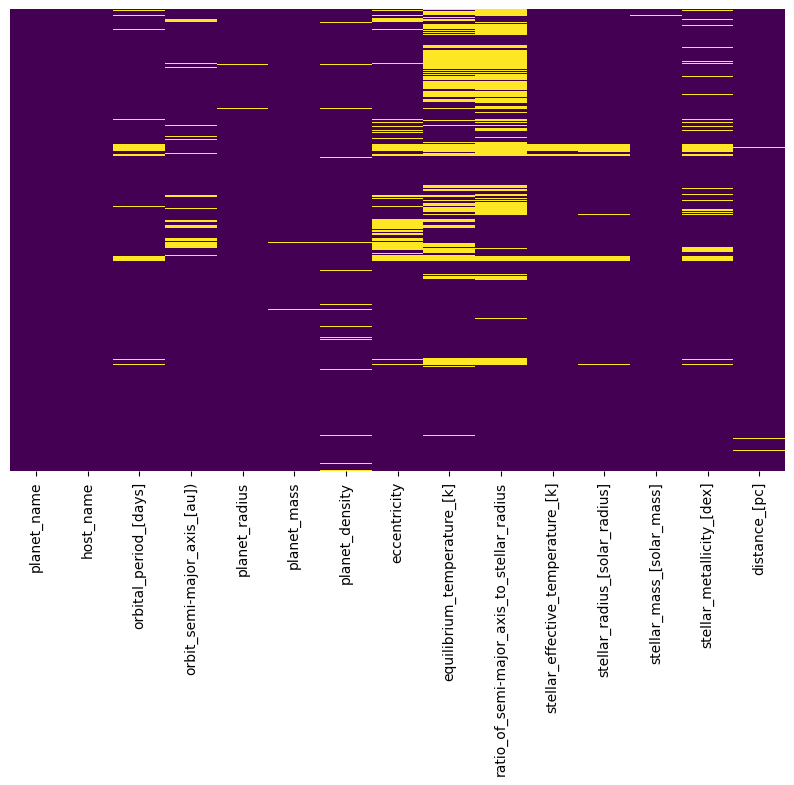

In [29]:
plt.figure(figsize=(10, 6))  

sns.heatmap(exo == ' ',   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();